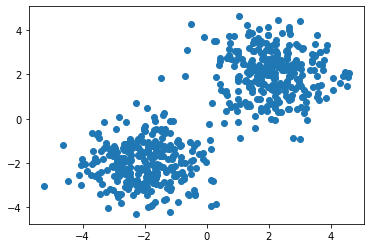

In [5]:
from utils import plot_svm_margins
from sklearn.svm import SVC
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

blobs = make_blobs((300,300), 2, centers = [(-2,-2), (2,2)], random_state= 42)[0]

plt.scatter(blobs[:,0], blobs[:,1])

In [8]:
from sklearn.cluster import KMeans

kmean = KMeans(2)
kmean.fit(blobs)

blobs = np.c_[blobs, kmean.predict(blobs)]
blobs


array([[-1.77590752, -1.9874076 ,  1.        ],
       [ 1.9803622 ,  2.55248995,  0.        ],
       [-2.81822068,  0.09238728,  1.        ],
       ...,
       [ 4.40341559,  1.9423812 ,  0.        ],
       [ 0.65181458,  2.74326409,  0.        ],
       [ 1.07676675,  0.64831539,  0.        ]])

In [9]:
blobs.shape

(600, 3)

<AxesSubplot:xlabel='K1', ylabel='K2'>

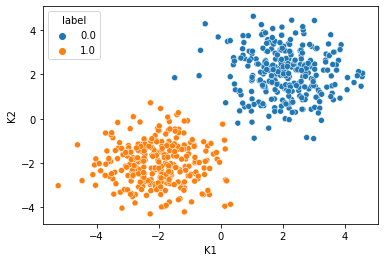

In [14]:
df_blobs = pd.DataFrame(blobs, columns= ['K1', 'K2', 'label'])
sns.scatterplot(data = df_blobs, x = 'K1', y = 'K2', hue = 'label')

In [16]:
X, y = df_blobs.drop('label', axis = 1).to_numpy(), df_blobs['label'].to_numpy()
X

array([[-1.77590752, -1.9874076 ],
       [ 1.9803622 ,  2.55248995],
       [-2.81822068,  0.09238728],
       ...,
       [ 4.40341559,  1.9423812 ],
       [ 0.65181458,  2.74326409],
       [ 1.07676675,  0.64831539]])

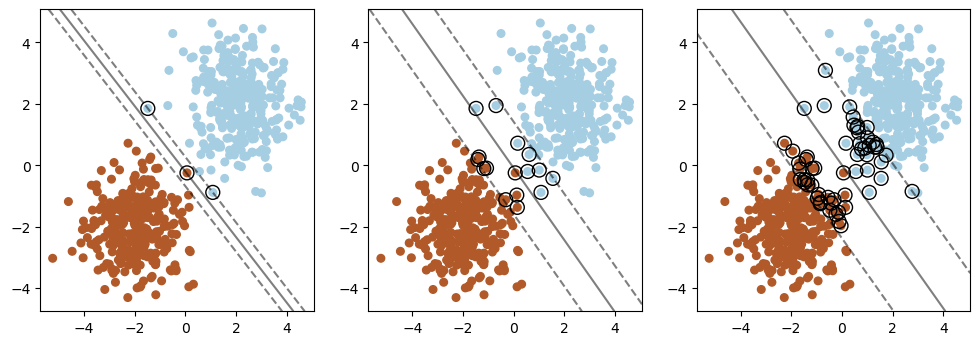

In [18]:
fig, ax = plt.subplots(1,3, dpi = 100, figsize = (12,4))

for i, C in enumerate([10, .1, .01], 1):
    plt.subplot(1,3,i)
    classifier = SVC(kernel = 'linear', C = C)
    plot_svm_margins(classifier, X, y)

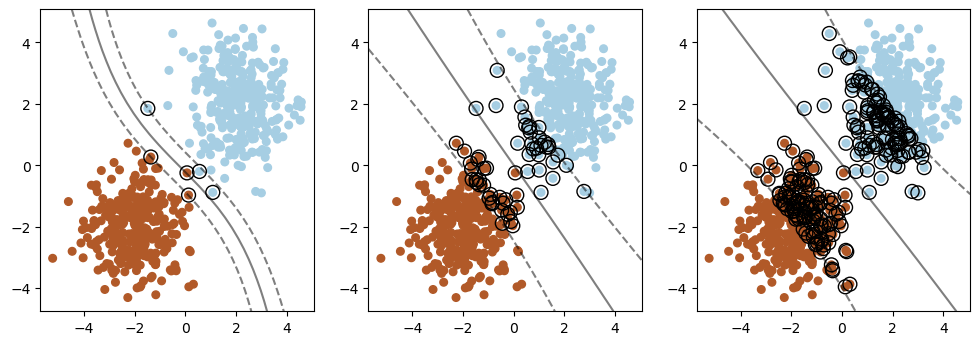

In [22]:
fig, ax = plt.subplots(1,3, dpi = 100, figsize = (12,4))

for i, C in enumerate([10, .1, .01], 1):
    plt.subplot(1,3,i)
    classifier = SVC(kernel = 'sigmoid', C = C)
    plot_svm_margins(classifier, X, y)